Задание

Вопросы по заданию

В этом разделе можно задать вопросы и получить ответ.

Преподаватель: Олег Булыгин

**Домашнее задание к лекции «Корреляция и корреляционный анализ»**

Задание также доступно здесь http://prntscr.com/ujddtw


Возьмите датасет Mortality and Water Hardness**

https://www.kaggle.com/ukveteran/mortality-and-water-hardness


В этом датасете содержатся данные по средней годовой смертности на

100000 населения и концентрации кальция в питьевой воде для 61

большого города в Англии и Уэльсе. Города дополнительно поделены на

северные и южные.


**Задание 1.**
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

**Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('water.csv',index_col=0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [213]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


## Корреляция (север+юг)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

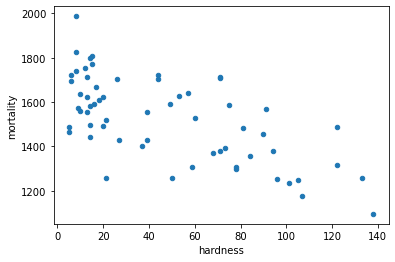

In [15]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [215]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [216]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [217]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Коэф-т корреляции по Пирсону= -0.654849. По Спирмену- -0.631665. Это средняя обратная взяимосвязь- с повышением уровня жесткости воды- смертность падает.

НО!
**учитывая мое экспертное мнение- такой зависимости нет(в данных есть,но мой вывод - зависимость ложная )**

Чем больше минеральных солей растворено в воде, тем она вреднее для ежедневного применения (соли накапливаются в почках, кожа стареет).

## Регрессия (север+юг)

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [219]:
X = df[['hardness']]
y = df['mortality']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [221]:
X_train.shape

(42, 1)

In [222]:
y_train.shape

(42,)

In [223]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [224]:
model.coef_

array([-3.13167087])

In [225]:
model.intercept_

1668.9722977277095

Получили формулу регресии
у=ax+b=-3.13167087*x + 1668.9722977277095

In [226]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [227]:
# Найдем значение коэффициента детерминации
model.score(X_test, y_test) 

0.5046490611017092

т.к. коэффициент детерминации должен стремиться к 1, и находиться в интервале от 0 до 1, то **нашу прогнозную модель можно назвать адекватной**

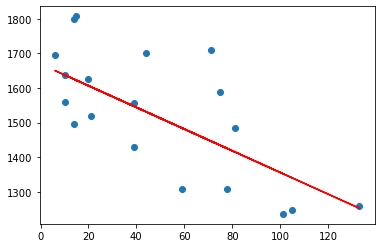

In [228]:
#Построим график scatterplot, где на тестовой выборке красной линией обозначена прогнозная модель
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

## График остатков регрессии (север+юг)

In [229]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [231]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [232]:
X_const.shape

(42, 2)

In [233]:
X[:5]


,hardness
1,105
2,17
3,5
4,14
5,18


In [234]:
model = sm.OLS(y_train, X_const)
results = model.fit()

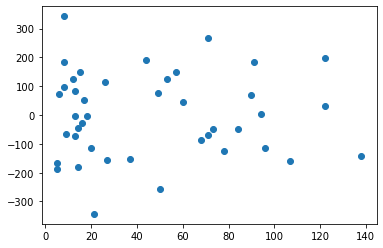

In [235]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

Остатки регресии - это разности между наблюдаемыми значениями и значениями, предсказанными изучаемой регрессионной моделью. 
Анализ остатков говорит о том, что **модель подобрано правильно** (остатки хаотичны, нет закономерностей в чередовании знаков,нет системной составляющей)


**Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

## Будем исследовать южные города 

In [236]:
#Будем исследовать южные города
df_south = df.loc[df['location'] == 'South']
df_south.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
3,South,Birmingham,1466,5
8,South,Bournemouth,1299,78
10,South,Brighton,1359,84
11,South,Bristol,1392,73


## Корреляция (юг)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

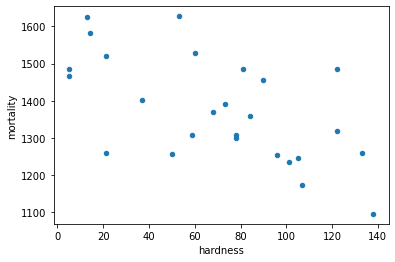

In [237]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

In [238]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [239]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [240]:
df_south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


Коэф-т корреляции по Пирсону= -0.602153. По Спирмену- -0.595723. Это средняя обратная взяимосвязь- с повышением уровня жесткости воды- смертность падает.


## Регрессия (юг)

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [242]:
X = df_south[['hardness']]
y = df_south['mortality']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [244]:
X_train.shape

(18, 1)

In [245]:
y_train.shape

(18,)

In [246]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [247]:
model.coef_

array([-3.51342921])

In [249]:
model.intercept_

1640.2204603423374

Получили формулу регресии
у=ax+b=--3.51342921*x + 1640.2204603423374

In [250]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [251]:
# Найдем значение коэффициента детерминации
model.score(X_test, y_test) 

-2.551922301235205

т.к коэффициент детерминации R2= 1-SSres/SStot и должен стремиться к 1, а у нас вообще отрицательное значение(что говорит о существенном превосходстве суммы квадратов ошибок нашей модели SSres над наивной(средней)SStot,то мы делаем вывод, что **модель получилась бесполезной и ее предсказания хуже, чем оценки на основе среднего значения.**

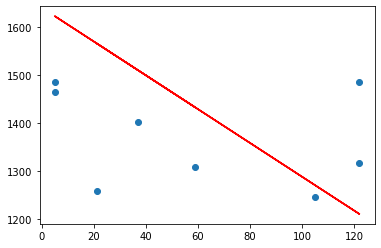

In [252]:
#Построим график scatterplot, где на тестовой выборке красной линией обозначена прогнозная модель
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

## График остатков регрессии (юг)

In [175]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [177]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [178]:
X_const.shape

(18, 2)

In [179]:
X[:5]


,hardness
1,105
3,5
8,78
10,84
11,73


In [180]:
model = sm.OLS(y_train, X_const)
results = model.fit()

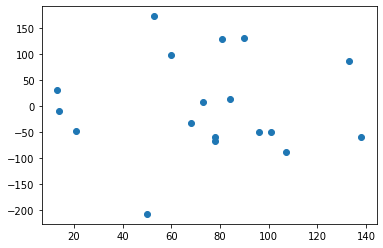

In [181]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

В связи с тем, что мной сделан вывод о бесполезнсти данной модели в связи с к-том детерминациии равным -2,55, **нет смысла оценивать остатки**

## Будем исследовать северные города 

In [253]:
#Будем исследовать южные города
df_north = df.loc[df['location'] == 'North']
df_north.head()

,location,town,mortality,hardness
2,North,Birkenhead,1668,17
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10
7,North,Bootle,1807,15


## Корреляция (север)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

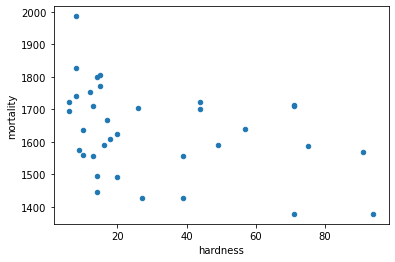

In [254]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [255]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [256]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [257]:
df_north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


Коэф-т корреляции по Пирсону= -0.368598. По Спирмену- -0.404208. Это слабая обратная взяимосвязь- с повышением уровня жесткости воды- смертность падает.


## Регрессия (север)

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [259]:
X = df_north[['hardness']]
y = df_north['mortality']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [261]:
X_train.shape

(24, 1)

In [262]:
y_train.shape

(24,)

In [263]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [264]:
model.coef_

array([-1.97686226])

In [265]:
model.intercept_

1688.150229031281

Получили формулу регресии
у=ax+b=-1.97686226*x + 1688.150229031281

In [266]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [267]:
# Найдем значение коэффициента детерминации
model.score(X_test, y_test) 

0.018885304285745863

В связи с тем, что коэф.детерминации должен стремиться к 1, а у нас 0.0188 (что близко к нулю), можно сказать что **модель данных практически не отличается от наивной (средней) модели.**

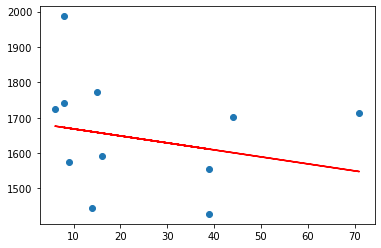

In [268]:
#Построим график scatterplot, где на тестовой выборке красной линией обозначена прогнозная модель
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

## График остатков регрессии (север)

In [269]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [271]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [272]:
X_const.shape

(24, 2)

In [273]:
X[:5]


,hardness
2,17
4,14
5,18
6,10
7,15


In [274]:
model = sm.OLS(y_train, X_const)
results = model.fit()

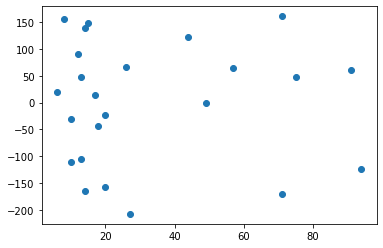

In [275]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

Об остатках можно сказать что они сильно сгруппированы при уровне жесткости воды прим. от 5 о до 20. 
Поэтому можно сказать что модель подобрана неправильно.

# Общие выводы

**Общая модель данных**- зависимость есть, коэф. детерминации 0.5- неплохо, остатки тоже хорошие. Можно сказать, что модель данных подобрана правильно и все OK.

Но когда мы смотрим данные в разрезе юга и севера, то зависимостии у нас становятся слабыми, коэф-ты детерминации на юге -2,55 (мусорная модель), а на севере 0,01 - т.е. модель данных ничем не лучше наивной модели. 

В совокупности полученных мной данных можно сделать вывод:

**зависимости смертности от жесткости воды нет**